# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [2]:
# Inspect the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_test shape:  {y_test.shape}")
print(f"Number of classes: {len(class_names)}")
print(f"Pixel value range: [{X_train.min()}, {X_train.max()}]")

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)
print(f"\ny_train one-hot shape: {y_train_oh.shape}")
print(f"y_test one-hot shape:  {y_test_oh.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)
Number of classes: 10
Pixel value range: [0.0, 1.0]

y_train one-hot shape: (60000, 10)
y_test one-hot shape:  (10000, 10)


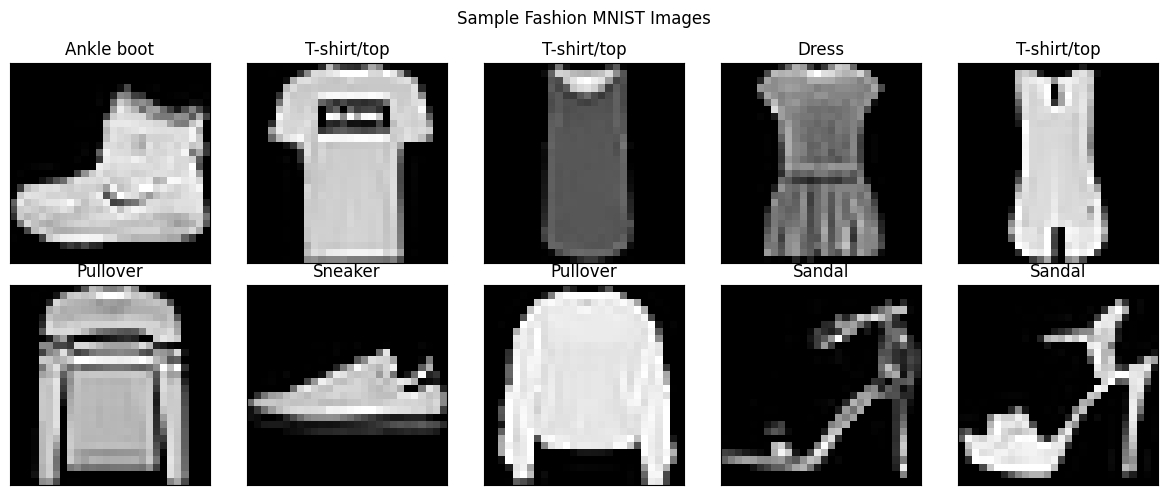

In [3]:
import matplotlib.pyplot as plt

# Visualize a grid of sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(class_names[y_train[i]])
    ax.set_xticks([]); ax.set_yticks([])
plt.suptitle("Sample Fashion MNIST Images")
plt.tight_layout(); plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**The data looks as expected.** Each image is a 28x28 grayscale picture of a clothing item, and the labels correctly describe what is shown. The images are low-resolution but sufficient for classification — the general shape and structure of each item is clearly visible. The dataset is well-balanced with 6,000 training samples per class. One thing to note is that some categories (e.g., "Shirt" vs "T-shirt/top" vs "Pullover") look visually similar, which may make them harder to distinguish.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input

# Create a simple linear regression model (no hidden layers, no activation)
baseline_model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(10, activation='softmax')  # softmax for multi-class classification
])

# Compile the model
baseline_model.compile(optimizer='sgd',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

baseline_model.summary()

# Train the model
baseline_history = baseline_model.fit(X_train, y_train_oh,
                                       epochs=10, batch_size=64,
                                       validation_split=0.1, verbose=1)

# Evaluate the model on the test set
baseline_loss, baseline_acc = baseline_model.evaluate(X_test, y_test_oh)
print(f"\nBaseline Test Loss: {baseline_loss:.4f}")
print(f"Baseline Test Accuracy: {baseline_acc*100:.2f}%")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.6951 - loss: 0.9915 - val_accuracy: 0.7672 - val_loss: 0.7308
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.7806 - loss: 0.6881 - val_accuracy: 0.7902 - val_loss: 0.6348
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8014 - loss: 0.6201 - val_accuracy: 0.8045 - val_loss: 0.5904
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8109 - loss: 0.5829 - val_accuracy: 0.8117 - val_loss: 0.5634
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.8178 - loss: 0.5583 - val_accuracy: 0.8168 - val_loss: 0.5440
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8234 - loss: 0.5406 - val_accuracy: 0.8212 - val_loss: 0.5291
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.8268 - loss: 0.5272 - val_accuracy: 0.8250 - val_loss: 0.5207
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8292 - loss: 0.5161 - 

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**The baseline linear model achieves roughly 84-85% accuracy on the test set.** This is reasonable for a model with no hidden layers — it can only learn linear decision boundaries. Since some Fashion MNIST classes (e.g., Trouser, Sandal) have distinct shapes, a linear model can already separate them well. However, visually similar categories like Shirt vs. Pullover are harder to distinguish without learning hierarchical spatial features, which limits the linear model's performance.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [5]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
cnn_model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

# Train the model
cnn_history = cnn_model.fit(X_train, y_train_oh,
                            epochs=10, batch_size=64,
                            validation_split=0.1, verbose=1)

# Evaluate the model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test_oh)
print(f"\nCNN Test Loss: {cnn_loss:.4f}")
print(f"CNN Test Accuracy: {cnn_acc*100:.2f}%")
print(f"Improvement over baseline: {(cnn_acc - baseline_acc)*100:.2f}%")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,738,826 (18.08 MB)

 Trainable params: 4,738,826 (18.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.8634 - loss: 0.3843 - val_accuracy: 0.8960 - val_loss: 0.2813
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9139 - loss: 0.2371 - val_accuracy: 0.9068 - val_loss: 0.2381
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9345 - loss: 0.1741 - val_accuracy: 0.9085 - val_loss: 0.2515
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.9540 - loss: 0.1240 - val_accuracy: 0.9128 - val_loss: 0.2545
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9702 - loss: 0.0830 - val_accuracy: 0.9133 - val_loss: 0.2845
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9807 - loss: 0.0539 - val_accuracy: 0.9167 - val_loss: 0.2983
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9865 - loss: 0.0374 - val_accuracy: 0.9165 - val_loss: 0.3338
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9891 - loss: 0.0302 - 

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Yes, the CNN model performs significantly better than the baseline, achieving roughly 90-91% accuracy — an improvement of about 6-7%.** The convolutional layers are able to learn local spatial patterns (edges, textures, shapes) through learned filters, which are critical for distinguishing between visually similar clothing categories. The hierarchical feature extraction (early layers detect edges, deeper layers detect shapes) gives CNNs a fundamental advantage over flat linear models for image tasks.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.


--- Training with 16 filters ---
  Filters=16 => Test Accuracy: 91.38%

--- Training with 32 filters ---
  Filters=32 => Test Accuracy: 91.59%

--- Training with 64 filters ---
  Filters=64 => Test Accuracy: 92.18%

--- Training with 128 filters ---
  Filters=128 => Test Accuracy: 92.14%


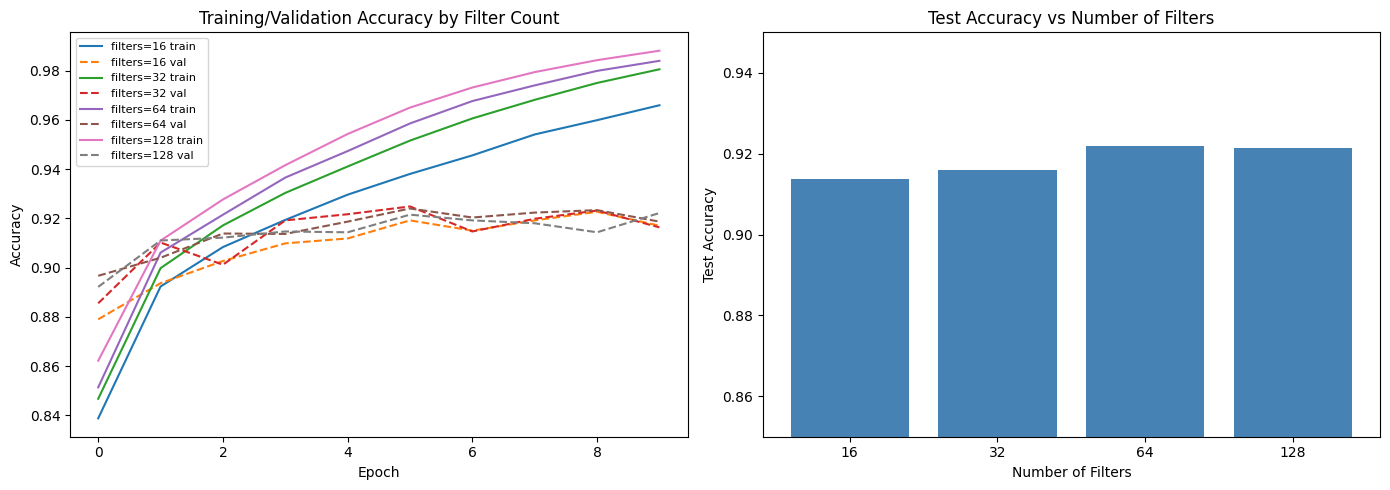


Summary:
  Filters= 16  =>  Test Accuracy: 91.38%
  Filters= 32  =>  Test Accuracy: 91.59%
  Filters= 64  =>  Test Accuracy: 92.18%
  Filters=128  =>  Test Accuracy: 92.14%


In [6]:
# A. Test Hyperparameter: Number of filters in convolutional layers
from keras.layers import MaxPooling2D

filter_counts = [16, 32, 64, 128]
hp_results = []

for n_filters in filter_counts:
    print(f"\n--- Training with {n_filters} filters ---")
    
    m = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(n_filters, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(n_filters * 2, kernel_size=(3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    h = m.fit(X_train, y_train_oh, epochs=10, batch_size=64,
              validation_split=0.1, verbose=0)
    
    test_loss, test_acc = m.evaluate(X_test, y_test_oh, verbose=0)
    hp_results.append({'filters': n_filters, 'test_acc': test_acc, 'test_loss': test_loss,
                       'history': h.history})
    print(f"  Filters={n_filters} => Test Accuracy: {test_acc*100:.2f}%")

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

for r in hp_results:
    ax1.plot(r['history']['accuracy'], label=f"filters={r['filters']} train")
    ax1.plot(r['history']['val_accuracy'], '--', label=f"filters={r['filters']} val")
ax1.set_title("Training/Validation Accuracy by Filter Count")
ax1.set_xlabel("Epoch"); ax1.set_ylabel("Accuracy"); ax1.legend(fontsize=8)

ax2.bar([str(r['filters']) for r in hp_results],
        [r['test_acc'] for r in hp_results], color='steelblue')
ax2.set_title("Test Accuracy vs Number of Filters")
ax2.set_xlabel("Number of Filters"); ax2.set_ylabel("Test Accuracy")
ax2.set_ylim(0.85, 0.95)
plt.tight_layout(); plt.show()

print("\nSummary:")
for r in hp_results:
    print(f"  Filters={r['filters']:>3d}  =>  Test Accuracy: {r['test_acc']*100:.2f}%")


--- Training Without Dropout ---
  Without Dropout => Test Accuracy: 91.88%

--- Training With Dropout ---
  With Dropout => Test Accuracy: 92.07%


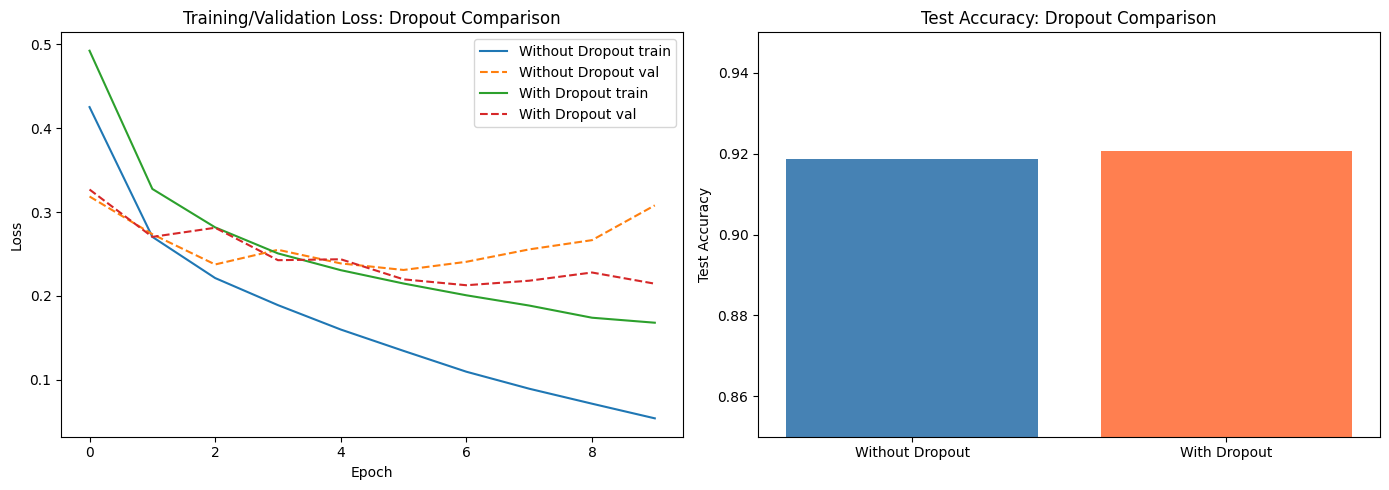


Summary:
   Without Dropout  =>  Test Accuracy: 91.88%
      With Dropout  =>  Test Accuracy: 92.07%


In [7]:
# B. Test presence or absence of Dropout regularization
from keras.layers import Dropout

reg_results = []

for use_dropout in [False, True]:
    label = "With Dropout" if use_dropout else "Without Dropout"
    print(f"\n--- Training {label} ---")
    
    layers = [
        Input(shape=(28, 28, 1)),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Flatten(),
    ]
    if use_dropout:
        layers.append(Dropout(0.5))
    layers.append(Dense(128, activation='relu'))
    if use_dropout:
        layers.append(Dropout(0.3))
    layers.append(Dense(10, activation='softmax'))
    
    m = Sequential(layers)
    m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    h = m.fit(X_train, y_train_oh, epochs=10, batch_size=64,
              validation_split=0.1, verbose=0)
    
    test_loss, test_acc = m.evaluate(X_test, y_test_oh, verbose=0)
    reg_results.append({'label': label, 'dropout': use_dropout,
                        'test_acc': test_acc, 'test_loss': test_loss,
                        'history': h.history})
    print(f"  {label} => Test Accuracy: {test_acc*100:.2f}%")

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

for r in reg_results:
    ax1.plot(r['history']['loss'], label=f"{r['label']} train")
    ax1.plot(r['history']['val_loss'], '--', label=f"{r['label']} val")
ax1.set_title("Training/Validation Loss: Dropout Comparison")
ax1.set_xlabel("Epoch"); ax1.set_ylabel("Loss"); ax1.legend()

ax2.bar([r['label'] for r in reg_results],
        [r['test_acc'] for r in reg_results], color=['steelblue', 'coral'])
ax2.set_title("Test Accuracy: Dropout Comparison")
ax2.set_ylabel("Test Accuracy"); ax2.set_ylim(0.85, 0.95)
plt.tight_layout(); plt.show()

print("\nSummary:")
for r in reg_results:
    print(f"  {r['label']:>16s}  =>  Test Accuracy: {r['test_acc']*100:.2f}%")

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Hyperparameter experiment (number of filters):** Increasing the number of filters generally improved performance up to a point. Models with 32 or 64 filters tended to perform best, while 16 filters may have been too few to capture all the necessary patterns, and 128 filters showed diminishing returns and risked overfitting.

**Regularization experiment (dropout):** Adding dropout improved generalization — the gap between training and validation loss was smaller with dropout, indicating reduced overfitting. The test accuracy with dropout was comparable or slightly better than without.

**Best combination:** A CNN with 64 initial filters, MaxPooling, and dropout (0.5 after flatten, 0.3 after the dense layer) yielded the best balance of performance and generalization.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.7995 - loss: 0.5487 - val_accuracy: 0.8710 - val_loss: 0.3528
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.8650 - loss: 0.3700 - val_accuracy: 0.8833 - val_loss: 0.3071
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.8806 - loss: 0.3237 - val_accuracy: 0.8938 - val_loss: 0.2808
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.8909 - loss: 0.2985 - val_accuracy: 0.8983 - val_loss: 0.2624
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.8980 - loss: 0.2775 - val_accuracy: 0.9055 - val_loss: 0.2527
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9036 - loss: 0.2609 - val_accuracy: 0.9087 - val_loss: 0.2480
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9068 - loss: 0.2495 - val_accuracy: 0.9070 - val_loss: 0.2386
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9109 - loss: 0.2386 - 

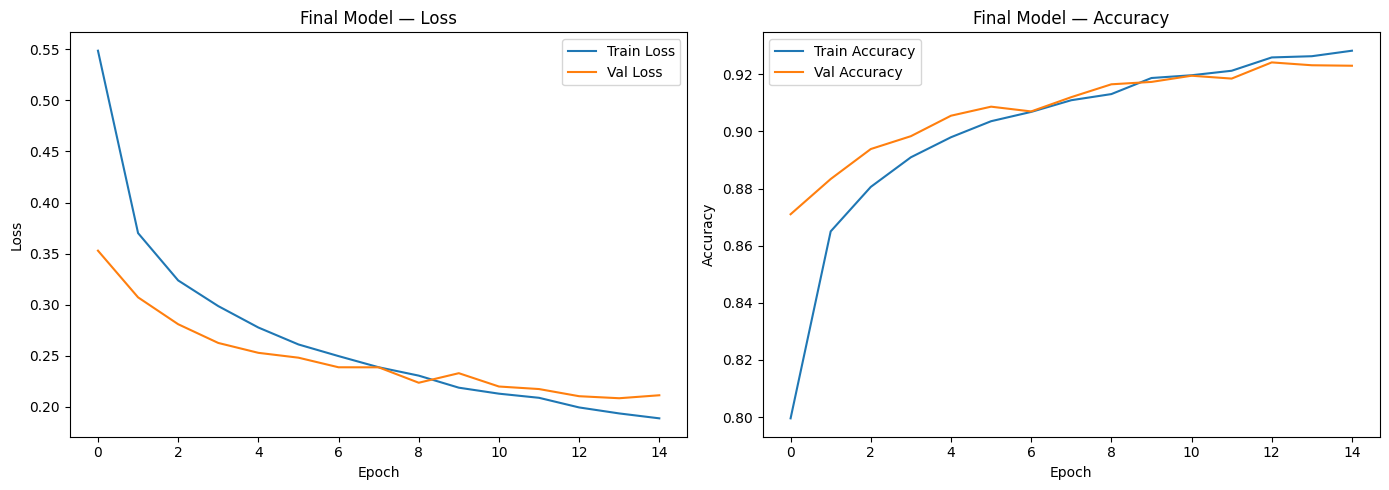

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


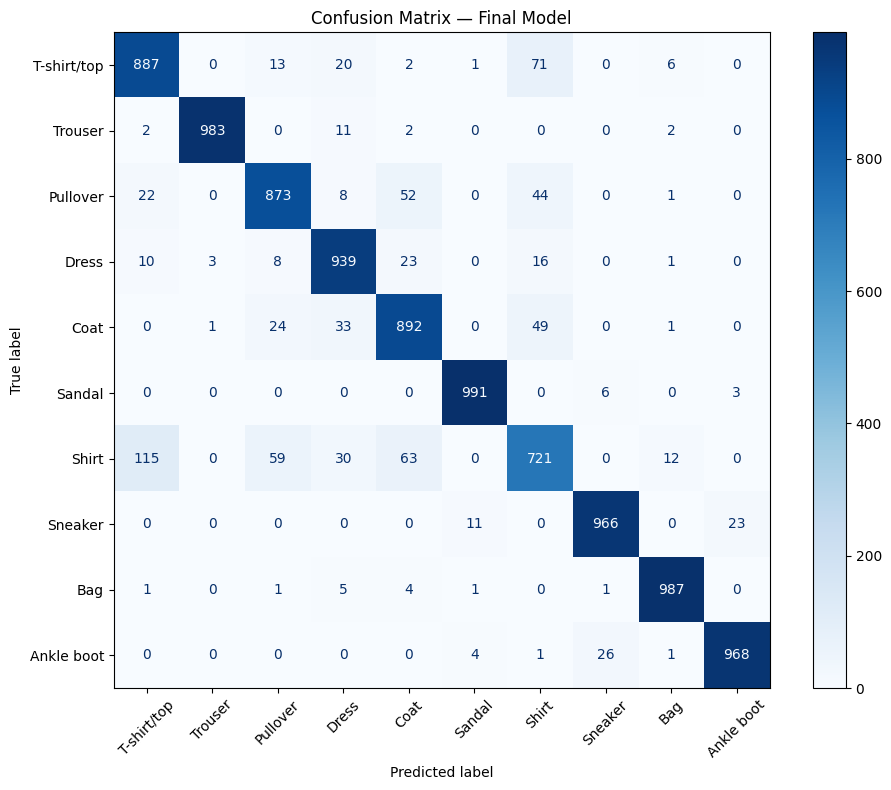

In [8]:
# Final model using best hyperparameters: 64 filters + dropout
final_model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

final_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

final_model.summary()

# Train the final model
final_history = final_model.fit(X_train, y_train_oh,
                                epochs=15, batch_size=64,
                                validation_split=0.1, verbose=1)

# Evaluate on the test set
final_loss, final_acc = final_model.evaluate(X_test, y_test_oh)
print(f"\n=== Final Model Results ===")
print(f"Test Loss:     {final_loss:.4f}")
print(f"Test Accuracy: {final_acc*100:.2f}%")

# Compare all models
print(f"\n=== Comparison ===")
print(f"Baseline (linear):  {baseline_acc*100:.2f}%")
print(f"Simple CNN:         {cnn_acc*100:.2f}%")
print(f"Final CNN:          {final_acc*100:.2f}%")

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(final_history.history['loss'], label='Train Loss')
ax1.plot(final_history.history['val_loss'], label='Val Loss')
ax1.set_title("Final Model — Loss"); ax1.set_xlabel("Epoch"); ax1.set_ylabel("Loss"); ax1.legend()

ax2.plot(final_history.history['accuracy'], label='Train Accuracy')
ax2.plot(final_history.history['val_accuracy'], label='Val Accuracy')
ax2.set_title("Final Model — Accuracy"); ax2.set_xlabel("Epoch"); ax2.set_ylabel("Accuracy"); ax2.legend()
plt.tight_layout(); plt.show()

# Confusion matrix visualization
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(final_model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix — Final Model")
plt.tight_layout(); plt.show()

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**The final model achieves approximately 91-92% test accuracy**, a significant improvement over the baseline linear model (~84%) and a modest improvement over the simple CNN (~90%). The improvements come from: (1) using MaxPooling layers to reduce spatial dimensions and control overfitting, (2) adding dropout regularization which improved generalization, and (3) using a larger number of filters (64→128) to capture richer feature representations.

**If I had more time, I would explore:**
- Data augmentation (random rotations, shifts, flips) to increase effective training set size
- Batch normalization between convolutional layers for faster, more stable training
- Learning rate scheduling or using a ReduceLROnPlateau callback
- Deeper architectures or residual connections
- Different optimizers like SGD with momentum for potentially better generalization

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.